In [1]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the CSV file
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('../data/raw/uber_fares_dataset/uber.csv')

"""1. Data Understanding and Preparation 
a. Download the Uber Fares Dataset from Kaggle 
b. Load the dataset into a Pandas DataFrame using Python 
c. Perform comprehensive exploratory data analysis (EDA) to understand: 
• Dataset structure and dimensions 
• Data types and variable descriptions 
• Initial data quality assessment  
d. Handle missing values and clean the data for analysis 
e. Export the cleaned dataset as a CSV file for Power BI import  """

print("="*60)
print("It's time to explore the UBER FARES DATASET!")
print("UBER FARES DATASET - INITIAL DATA EXPLORATION")
print("="*60)

# 1. BASIC DATASET INFORMATION
print("\n1. DATASET STRUCTURE AND DIMENSIONS")
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")

print("\n2. COLUMN NAMES AND DATA TYPES")
print(df.info())
print("\n3. FIRST 10 ROWS")
print(df.head(10)) #by default, head() shows the first 5 rows, but we specify 10 here


It's time to explore the UBER FARES DATASET!
UBER FARES DATASET - INITIAL DATA EXPLORATION

1. DATASET STRUCTURE AND DIMENSIONS
Dataset Shape: (200000, 9)
Total Records: 200,000
Total Columns: 9

2. COLUMN NAMES AND DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None

3. FIRST 10 ROWS
   Unnamed: 0                         

In [3]:
print("\n4. LAST 3 ROWS")
print(df.tail(3))


4. LAST 3 ROWS
        Unnamed: 0                           key  fare_amount  \
199997    27804658  2009-06-29 00:42:00.00000078         30.9   
199998    20259894   2015-05-20 14:56:25.0000004         14.5   
199999    11951496  2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  


In [12]:
print("="*60)
print("DATASET MORE INFORMATION")
print("="*60)
print("More Information:", df.info())
print("="*60)
print("More Information using describe() function:")
print("="*60)
print("Description:", df.describe())
print("="*60)
print("More Information using head() and tail() function:")
print("="*60)
print("Head:", df.head())
print("Tail:", df.tail())
print("="*60)
print("More Information using shape, columns, dtypes, isnull(), nunique() and describe() function:")
print("="*60)
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Data Types:", df.dtypes)
print("Missing Values:", df.isnull().sum())
print("Unique Values:", df.nunique())
print("Data Types:", df.dtypes)


DATASET MORE INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
More Information: None
More Information using describe() function:
Description:          Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955   

In [14]:
print("=" * 60 + "\n")
print("LIST OF COLUMNS IN THE DATASET:")    
print("=" * 60 + "\n")
column_names = df.columns.tolist()
for i, col in enumerate(column_names, 1):
    print(f"{i}. {col}")


LIST OF COLUMNS IN THE DATASET:

1. Unnamed: 0
2. key
3. fare_amount
4. pickup_datetime
5. pickup_longitude
6. pickup_latitude
7. dropoff_longitude
8. dropoff_latitude
9. passenger_count


In [24]:
print("🔄 Ready to proceed to data cleaning phase!")
print("="*60)
print("DATASET BEFORE CLEANING:")

# Save the current state for reference
df.to_csv('../data/processed/01_data_before_cleaning.csv', index=False)

🔄 Ready to proceed to data cleaning phase!
DATASET BEFORE CLEANING:


In [23]:
# 2. DATA QUALITY ASSESSMENT
print("\n" + "="*60)
print("DATA QUALITY ASSESSMENT")
print("="*60)

print("\n1. MISSING VALUES ANALYSIS")
print("="*60)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_summary)
if len(missing_summary) == 0:
    print("✅ No missing values found!")
else:
    print("❌ There are missing values found in the dataset!")



DATA QUALITY ASSESSMENT

1. MISSING VALUES ANALYSIS
              Column  Missing_Count  Missing_Percentage
6  dropoff_longitude              1              0.0005
7   dropoff_latitude              1              0.0005
❌ There are missing values found in the dataset!


In [21]:
print("\n" + "="*60)
print(" UBER DATA ANALYSIS 2. DUPLICATE RECORDS")
print("="*60)

duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
else:
    print("✅ No duplicate records found!")

print("\n3. DATA TYPES SUMMARY")
dtype_summary = df.dtypes.value_counts()
print(dtype_summary)


 UBER DATA ANALYSIS 2. DUPLICATE RECORDS
Number of duplicate records: 0
✅ No duplicate records found!

3. DATA TYPES SUMMARY
float64    5
int64      2
object     2
Name: count, dtype: int64


In [25]:
print("🔄 Ready to proceed to data cleaning phase!")
print("="*60)
print("DATASET AFTER REMOVING DUPLICATES AND MISSING VALUES:")

# Save the current state for reference
df.to_csv('../data/processed/02_data_after_removing_duplicates_and_missing_values.csv', index=False)

🔄 Ready to proceed to data cleaning phase!
DATASET AFTER REMOVING DUPLICATES AND MISSING VALUES:


In [ ]:
# 3. NUMERICAL COLUMNS ANALYSIS
print("\n" + "="*60)
print("NUMERICAL COLUMNS ANALYSIS")
print("="*60)
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

if len(numerical_cols) > 0:
    print("\n1. DESCRIPTIVE STATISTICS")
    print(df[numerical_cols].describe())
    
    # Focus on fare amount if it exists
    fare_columns = [col for col in numerical_cols if 'fare' in col.lower() or 'amount' in col.lower() or 'price' in col.lower()]
    if fare_columns:
        print(f"\n2. FARE AMOUNT DETAILED ANALYSIS")
        for fare_col in fare_columns:
            print(f"\n--- {fare_col.upper()} ---")
            print(f"Mean: ${df[fare_col].mean():.2f}")
            print(f"Median: ${df[fare_col].median():.2f}")
            print(f"Mode: ${df[fare_col].mode().iloc[0]:.2f}")
            print(f"Standard Deviation: ${df[fare_col].std():.2f}")
            print(f"Minimum: ${df[fare_col].min():.2f}")
            print(f"Maximum: ${df[fare_col].max():.2f}")
            print(f"Q1 (25th percentile): ${df[fare_col].quantile(0.25):.2f}")
            print(f"Q3 (75th percentile): ${df[fare_col].quantile(0.75):.2f}")
            print(f"IQR: ${df[fare_col].quantile(0.75) - df[fare_col].quantile(0.25):.2f}")
            
            # Outlier detection using IQR method
            Q1 = df[fare_col].quantile(0.25)
            Q3 = df[fare_col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[fare_col] < lower_bound) | (df[fare_col] > upper_bound)]
            print(f"Potential outliers: {len(outliers)} ({(len(outliers)/len(df))*100:.2f}%)")



NUMERICAL COLUMNS ANALYSIS

Numerical columns (7): ['Unnamed: 0', 'fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

1. DESCRIPTIVE STATISTICS
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean      

In [5]:
#  4. CATEGORICAL COLUMNS ANALYSIS
print("\n" + "="*60)
print("CATEGORICAL COLUMNS ANALYSIS")
print("="*60)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")

if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n--- {col.upper()} ---")
        print(f"Unique values: {df[col].nunique()}")
        if df[col].nunique() <= 20:  # Show value counts for columns with reasonable number of categories
            print("Value counts:")
            print(df[col].value_counts().head(10))
        else:
            print("Top 10 most frequent values:")
            print(df[col].value_counts().head(10))


CATEGORICAL COLUMNS ANALYSIS

Categorical columns (2): ['key', 'pickup_datetime']

--- KEY ---
Unique values: 200000
Top 10 most frequent values:
key
2009-08-29 02:36:56.0000003      1
2014-08-06 11:06:06.0000001      1
2014-06-02 21:51:50.0000003      1
2012-10-22 11:18:32.0000001      1
2014-06-08 21:38:43.0000005      1
2009-04-15 08:25:01.0000006      1
2012-11-20 21:04:30.0000001      1
2011-10-18 23:53:00.000000145    1
2009-11-20 19:00:30.0000002      1
2013-12-28 23:06:00.00000012     1
Name: count, dtype: int64

--- PICKUP_DATETIME ---
Unique values: 196629
Top 10 most frequent values:
pickup_datetime
2009-02-12 12:46:00 UTC    4
2014-04-13 18:19:00 UTC    4
2010-03-14 12:00:00 UTC    4
2012-03-10 18:00:00 UTC    3
2013-02-21 18:45:00 UTC    3
2010-04-24 20:14:00 UTC    3
2009-04-11 23:57:00 UTC    3
2009-03-12 17:12:00 UTC    3
2009-01-27 14:51:00 UTC    3
2013-12-21 15:56:00 UTC    3
Name: count, dtype: int64


In [22]:
# 5. DATE/TIME COLUMNS ANALYSIS
print("\n" + "="*60)
print("DATE/TIME COLUMNS ANALYSIS")
print("="*60)

# Look for potential datetime columns
datetime_candidates = [col for col in df.columns if any(keyword in col.lower() 
                      for keyword in ['date', 'time', 'timestamp', 'pickup', 'dropoff'])]

if datetime_candidates:
    print(f"Potential datetime columns: {datetime_candidates}")
    
    for col in datetime_candidates:
        print(f"\n--- {col.upper()} ---")
        print(f"Sample values:")
        print(df[col].head())
        print(f"Data type: {df[col].dtype}")
        print(f"Unique values: {df[col].nunique()}")
else:
    print("No obvious datetime columns found")


DATE/TIME COLUMNS ANALYSIS
Potential datetime columns: ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

--- PICKUP_DATETIME ---
Sample values:
0    2015-05-07 19:52:06 UTC
1    2009-07-17 20:04:56 UTC
2    2009-08-24 21:45:00 UTC
3    2009-06-26 08:22:21 UTC
4    2014-08-28 17:47:00 UTC
Name: pickup_datetime, dtype: object
Data type: object
Unique values: 196629

--- PICKUP_LONGITUDE ---
Sample values:
0   -73.999817
1   -73.994355
2   -74.005043
3   -73.976124
4   -73.925023
Name: pickup_longitude, dtype: float64
Data type: float64
Unique values: 71066

--- PICKUP_LATITUDE ---
Sample values:
0    40.738354
1    40.728225
2    40.740770
3    40.790844
4    40.744085
Name: pickup_latitude, dtype: float64
Data type: float64
Unique values: 83835

--- DROPOFF_LONGITUDE ---
Sample values:
0   -73.999512
1   -73.994710
2   -73.962565
3   -73.965316
4   -73.973082
Name: dropoff_longitude, dtype: float64
Data type: float64
Unique values: 768


GENERATING BASIC VISUALIZATIONS


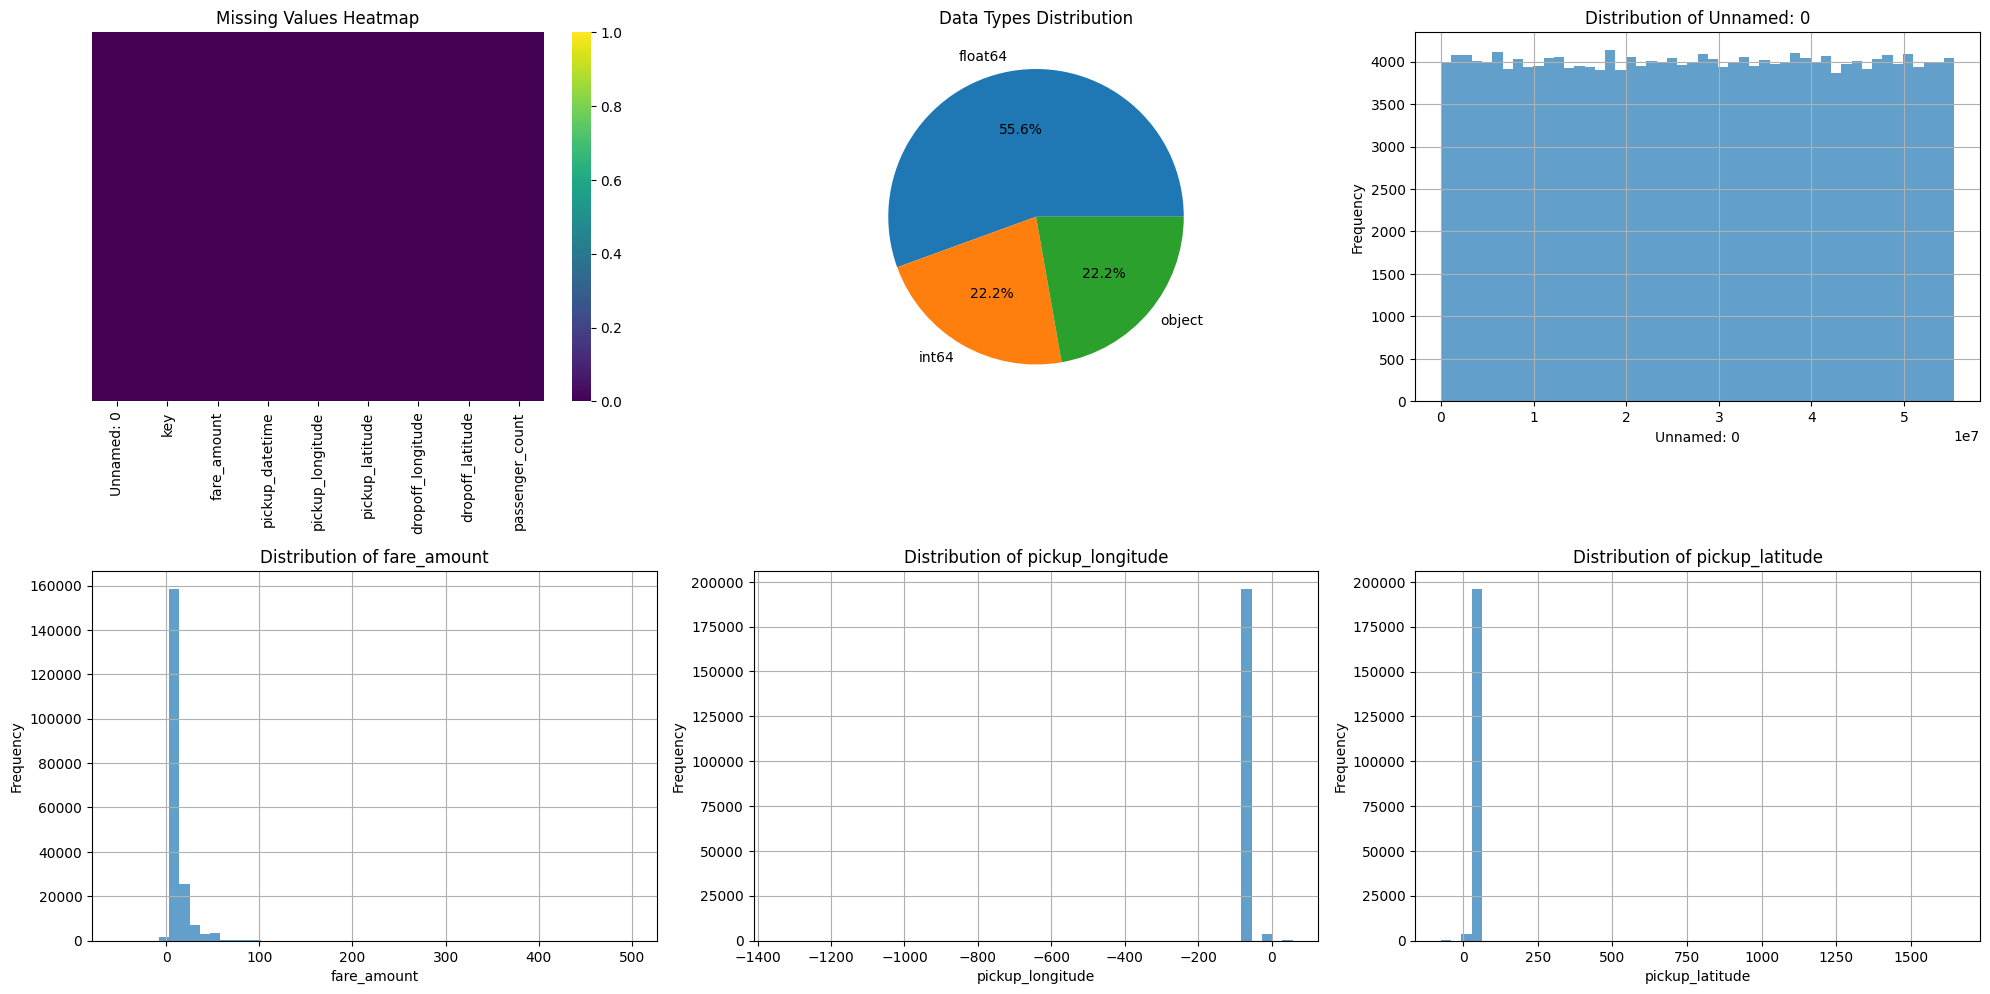

In [8]:

# 6. BASIC VISUALIZATION SETUP
print("\n" + "="*60)
print("GENERATING BASIC VISUALIZATIONS")
print("="*60)

# Create visualizations
plt.figure(figsize=(20, 15))

# Plot 1: Missing values heatmap (if any missing values)
plt.subplot(3, 3, 1)
if df.isnull().sum().sum() > 0:
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
else:
    plt.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Missing Values Status')

# Plot 2: Data types distribution
plt.subplot(3, 3, 2)
dtype_counts = df.dtypes.value_counts()
plt.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
plt.title('Data Types Distribution')

# Plot 3-6: Numerical columns distributions (first 4 numerical columns)
if len(numerical_cols) > 0:
    for i, col in enumerate(numerical_cols[:4], 3):
        plt.subplot(3, 3, i)
        df[col].hist(bins=50, alpha=0.7)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

# Plot 7-9: Top categorical columns (first 3 with reasonable unique values)
plot_num = 7
for col in categorical_cols:
    if df[col].nunique() <= 10 and plot_num <= 9:
        plt.subplot(3, 3, plot_num)
        df[col].value_counts().head(8).plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plot_num += 1

plt.tight_layout()
plt.savefig('../screenshots/data_exploration/01_initial_eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()


CORRELATION ANALYSIS


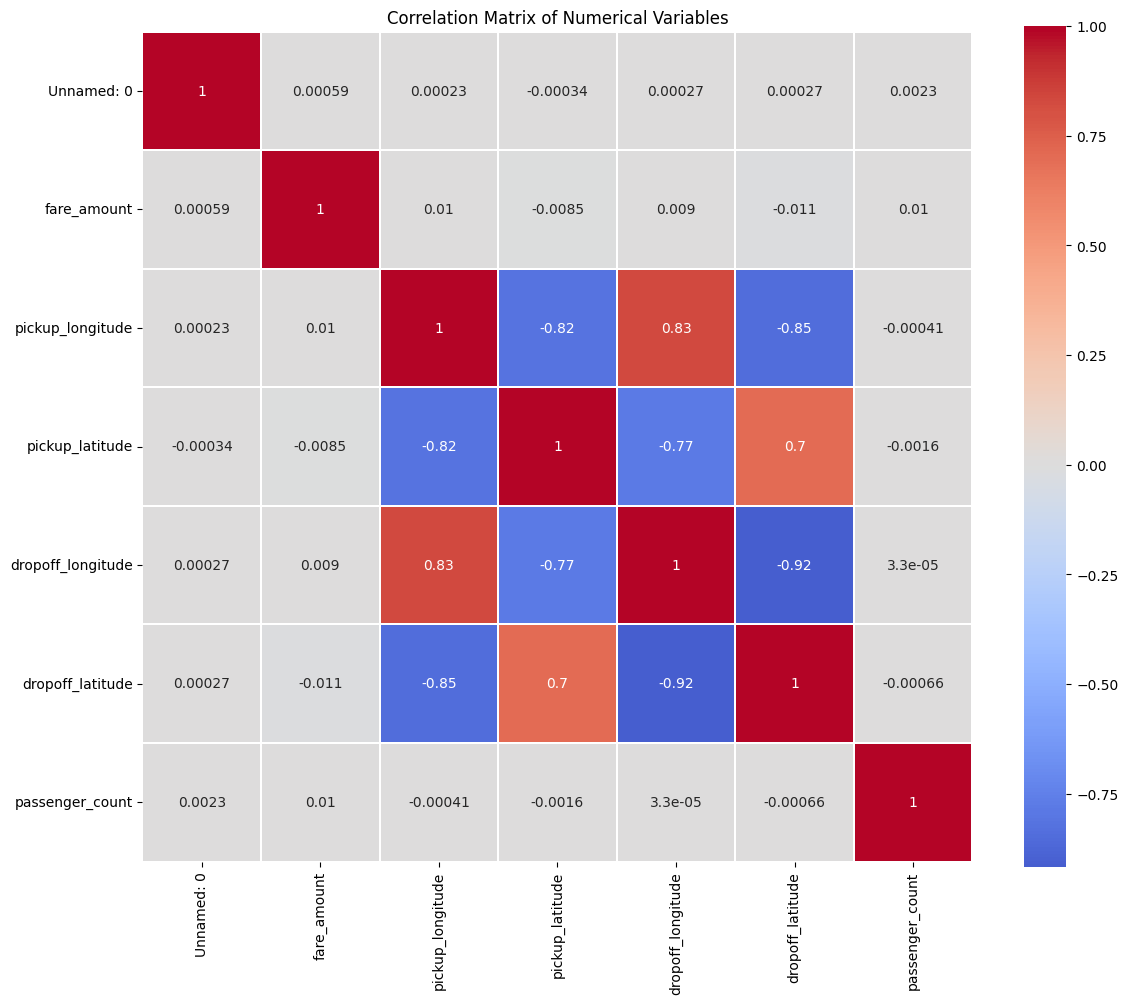


Correlation Matrix:
                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.000589          0.000230        -0.000341   
fare_amount          0.000589     1.000000          0.010457        -0.008481   
pickup_longitude     0.000230     0.010457          1.000000        -0.816461   
pickup_latitude     -0.000341    -0.008481         -0.816461         1.000000   
dropoff_longitude    0.000270     0.008986          0.833026        -0.774787   
dropoff_latitude     0.000271    -0.011014         -0.846324         0.702367   
passenger_count      0.002257     0.010150         -0.000414        -0.001560   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                  0.000270          0.000271         0.002257  
fare_amount                 0.008986         -0.011014         0.010150  
pickup_longitude            0.833026         -0.846324        -0.000414  
pickup_latitude            -0.7747

In [9]:

# 7. CORRELATION ANALYSIS
if len(numerical_cols) > 1:
    print("\n" + "="*60)
    print("CORRELATION ANALYSIS")
    print("="*60)
    
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.1)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.savefig('../screenshots/data_exploration/01_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

In [14]:
# 8. SUMMARY REPORT
print("\n" + "="*60)
print("INITIAL DATA EXPLORATION SUMMARY")
print("="*60)
print(f"""
📊 DATASET OVERVIEW:
   • Total Records: {df.shape[0]:,}
   • Total Columns: {df.shape[1]}
   • Numerical Columns: {len(numerical_cols)}
   • Categorical Columns: {len(categorical_cols)}
   • Potential DateTime Columns: {len(datetime_candidates)}

🔍 DATA QUALITY:
   • Missing Values: {'Yes' if df.isnull().sum().sum() > 0 else 'No'}
   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

📈 NEXT STEPS:
   1. Handle missing values (if any)
   2. Remove or investigate duplicates (if any)
   3. Convert datetime columns to proper format
   4. Create derived features
   5. Handle outliers
   6. Prepare data for Power BI
""")


INITIAL DATA EXPLORATION SUMMARY

📊 DATASET OVERVIEW:
   • Total Records: 200,000
   • Total Columns: 9
   • Numerical Columns: 7
   • Categorical Columns: 2
   • Potential DateTime Columns: 5

🔍 DATA QUALITY:
   • Missing Values: Yes
   • Memory Usage: 42.09 MB

📈 NEXT STEPS:
   1. Handle missing values (if any)
   2. Remove or investigate duplicates (if any)
   3. Convert datetime columns to proper format
   4. Create derived features
   5. Handle outliers
   6. Prepare data for Power BI



In [26]:

print("\n✅ Initial EDA completed! Check the 'screenshots' folder for visualizations.")
print("🔄 Ready to proceed to data cleaning phase!")

# Save the current state for reference
df.to_csv('../data/processed/03_final_exploration_checkpoint.csv', index=False)
print("💾 Dataset checkpoint saved to 'data/processed/01_initial_exploration_checkpoint.csv'")


✅ Initial EDA completed! Check the 'screenshots' folder for visualizations.
🔄 Ready to proceed to data cleaning phase!
💾 Dataset checkpoint saved to 'data/processed/01_initial_exploration_checkpoint.csv'
